In [179]:
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt   #Data visualisation libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn import metrics

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('final/Dhabi.csv', header=0, index_col=0)

In [180]:
df.shape

(376, 11)

In [181]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11
0,1.000,1.000,1.032,1.000,1.014,0.848,1.000,0.986,1.000,1.000,1.000
1,1.000,1.032,1.000,1.014,0.848,1.000,0.986,1.000,1.000,1.000,1.017
2,1.032,1.000,1.014,0.848,1.000,0.986,1.000,1.000,1.000,1.017,1.000
3,1.000,1.014,0.848,1.000,0.986,1.000,1.000,1.000,1.017,1.000,1.017
4,1.014,0.848,1.000,0.986,1.000,1.000,1.000,1.017,1.000,1.017,1.000


In [182]:
df.columns.tolist()

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 375
Data columns (total 11 columns):
1     376 non-null float64
2     376 non-null float64
3     376 non-null float64
4     376 non-null float64
5     376 non-null float64
6     376 non-null float64
7     376 non-null float64
8     376 non-null float64
9     376 non-null float64
10    376 non-null float64
11    376 non-null float64
dtypes: float64(11)
memory usage: 35.2 KB


In [186]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,1.018524,1.018364,1.018862,1.018854,1.018931,1.019391,1.019742,1.020239,1.020354,1.020628,1.020705
std,0.092545,0.092629,0.093031,0.093030,0.093027,0.093429,0.093031,0.093424,0.093408,0.093499,0.093494
min,0.842000,0.842000,0.842000,0.842000,0.842000,0.842000,0.842000,0.842000,0.842000,0.842000,0.842000
25%,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000
50%,1.017000,1.017000,1.017000,1.017000,1.017000,1.017000,1.017000,1.017000,1.017000,1.017000,1.017000
75%,1.037000,1.037000,1.037000,1.037000,1.037000,1.037000,1.037000,1.037000,1.037000,1.037000,1.037000
max,1.198000,1.198000,1.198000,1.198000,1.198000,1.198000,1.198000,1.198000,1.198000,1.198000,1.198000


In [187]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], dtype='object')

In [188]:
#sns.pairplot(df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


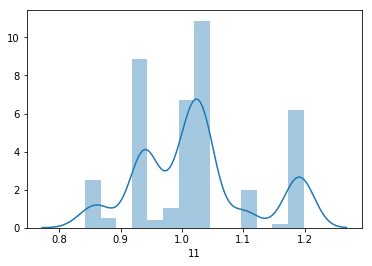

In [189]:
sns.distplot(df['11'])

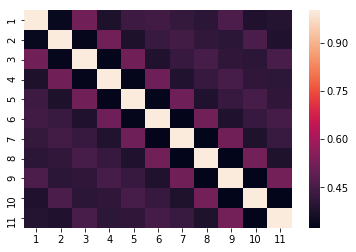

In [190]:
sns.heatmap(df.corr())

In [191]:
X = df[['1','2','3','4','5','6','7','8','9','10']].values
y = df['11'].values

In [192]:
# Test and Train Set Split
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, shuffle=True)

In [193]:
#train_test_split(y, shuffle=True)

In [194]:
lm.fit(X_train,y_train)
#lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [195]:
df.values

array([[1.   , 1.   , 1.032, ..., 1.   , 1.   , 1.   ],
       [1.   , 1.032, 1.   , ..., 1.   , 1.   , 1.017],
       [1.032, 1.   , 1.014, ..., 1.   , 1.017, 1.   ],
       ...,
       [1.187, 1.029, 1.187, ..., 0.98 , 1.187, 1.029],
       [1.029, 1.187, 0.94 , ..., 1.187, 1.029, 1.103],
       [1.187, 0.94 , 1.187, ..., 1.029, 1.103, 1.029]])

In [196]:
coeff_df = pd.DataFrame({'Attributes': df.columns.values(), 'Coefficients': lm.coef_()})

TypeError: 'numpy.ndarray' object is not callable

In [166]:
#make predctions on the test data
y_pred = lm.predict(X_test)
#predictions = lm.predict(X)

In [167]:
y_pred

array([0.98198081, 0.98290251, 0.96610233, 0.95605392, 1.12905386,
       0.95629091, 0.93243888, 0.99023702, 0.91907772, 0.97004471,
       1.13522957, 0.96505766, 1.15494108, 1.02770028, 1.09528847,
       1.14787215, 0.9911896 , 0.97658334, 1.00878716, 0.98045186,
       0.98454233, 1.08274809, 0.95804482, 0.98065026, 0.97916033,
       0.95748195, 0.94770407, 0.9324904 , 1.11648974, 0.97271711,
       0.9877585 , 1.12202374, 1.10725484, 1.12072918, 0.98281249,
       1.09237188, 1.08650304, 1.04397181, 0.98333521, 1.13296757,
       0.99225123, 1.05533425, 0.94300778, 0.9696037 , 1.02604316,
       1.12520419, 1.09696947, 1.16180735, 1.00514683, 0.98092353,
       1.05331951, 1.12156115, 1.05803179, 0.94469505, 0.94648242,
       1.09526379, 0.96723247, 1.07478281, 0.96445079, 1.09964917,
       1.00569404, 0.97779231, 1.00810868, 1.10305157, 1.06351875,
       0.97744916, 1.01410195, 0.98112734, 1.04500328, 0.96825226,
       1.05088677, 1.1232612 , 0.97171306, 1.08724585, 1.13774

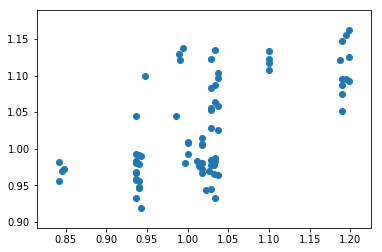

In [168]:
plt.scatter(y_test,y_pred)
#plt.scatter(y,predictions)

In [169]:
print("This is the actual price: ", y_test[:1])
print("This is the predicted price: ", y_pred[:1])

This is the actual price:  [0.842]
This is the predicted price:  [0.98198081]


In [170]:
#.values for series object to call function flatten()
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predictions': y_pred.flatten()})
comparison

,Actual,Predictions
0,0.842,0.981981
1,0.937,0.982903
2,1.017,0.966102
3,0.842,0.956054
4,0.989,1.129054
5,0.940,0.956291
6,0.937,0.932439
7,0.943,0.990237
8,0.943,0.919078
9,0.845,0.970045


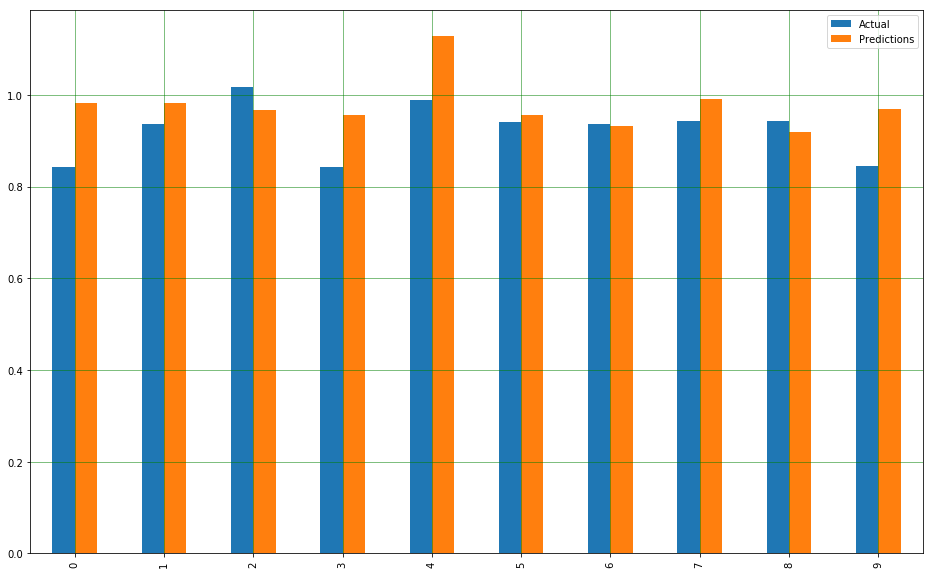

In [199]:
df1 = comparison.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

ValueError: x and y must be the same size

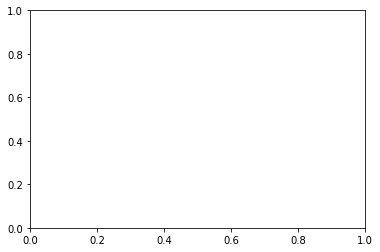

In [172]:
plt.scatter(X_test, y_pred, color='red')
plt.show()

In [173]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [174]:
print('Slope:' , lm.coef_)
print('Intercept:', lm.intercept_)
print('Mean absolute error', mae)
print('Mean squared error', mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.04427567  0.07742466  0.15604715  0.07029655  0.0543016   0.15874052
  0.04240248  0.03630357  0.28976175 -0.01715511]
Intercept: 0.09165969519418016
Mean absolute error 0.055680840458968525
Mean squared error 0.0047488549818836
Root mean squared error:  0.06891193642529282
R2 score:  0.40325671231866544


ValueError: x and y must be the same size

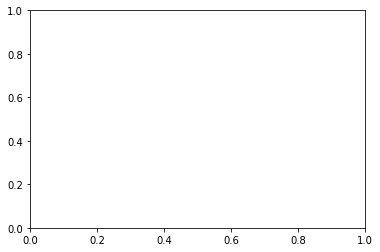

In [32]:
plt.scatter(X, y, s=10)
plt.xlable('x')
plt.ylabel('y')

ValueError: x and y must have same first dimension, but have shapes (376, 10) and (151,)

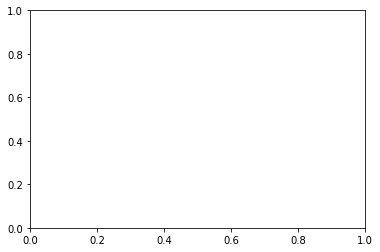

In [66]:
plt.plot(X, y_pred, color='r')
plt.show()